In [1]:
import csv
import matplotlib.pyplot as plt
import math

In [2]:
# Load in data
#filename = r'C:\Users\Syris Norelli\Documents\HYG_Data\hygdata_v3.csv'
filename = '/home/bellis/Downloads/hygdata_v3.csv'
with open(filename, newline = '') as csvfile:
    iterator = csv.reader(csvfile, delimiter=',', quotechar='|')
    full_arr = [row for row in iterator][1:] # The first thing is just the "how to read"

In [3]:
# Print data info
print('Number of stars: ' + str(len(full_arr)))
print('Number of data points per star: ' + str(len(full_arr[0])))
print('Interesting indexes per star:')
print('0: ID in master database. We use this to collaborate with #team-stars.')
print('6: Proper name of star (if any)')
print('7: Right ascension')
print('8: Declination')
print('9: Distance in parsecs')
print('13: Magnitude (Earth-frame). 6.5 is the naked eye limit.')
print('14: Absolute magnitude (standard distance of 40 parsecs from star in question)')
print('15: Star spectrum')
print('17, 18, and 19: x,y,z variables of star')
print('29: Constellation address')

Number of stars: 119614
Number of data points per star: 37
Interesting indexes per star:
0: ID in master database. We use this to collaborate with #team-stars.
6: Proper name of star (if any)
7: Right ascension
8: Declination
9: Distance in parsecs
13: Magnitude (Earth-frame). 6.5 is the naked eye limit.
14: Absolute magnitude (standard distance of 40 parsecs from star in question)
15: Star spectrum
17, 18, and 19: x,y,z variables of star
29: Constellation address


In [4]:
# Useful names for later
proper_stars = [x for x in full_arr if x[6] != ''] # All named stars (146 stars)
naked_eye = [x for x in full_arr if float(x[13]) <= 6.5] # All naked-eye visible stars (8913 stars)
# (Full_arr has 119614 stars.)

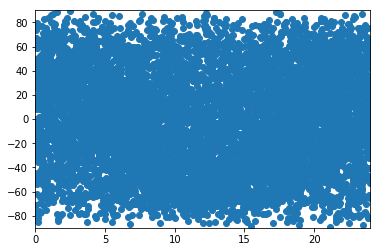

In [5]:
# Plotting where x/y is directly equal to phi/theta
to_plot = naked_eye

setting = 'full_sky' # Subset or full_sky

plt.clf()
plt.scatter([float(x[7]) for x in to_plot],[float(x[8]) for x in to_plot])
if setting == 'full_sky':
    plt.axis([0,24,-90,90])
if setting == 'subset':
    plt.axis([5,10,-50,0])
plt.show()

# The below isn't any sort of projection; it's simply mapping out the spherical coordinates in cartesian coordinates.
# This is why using techniques to quantify distortion won't work on this particular mapping.

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


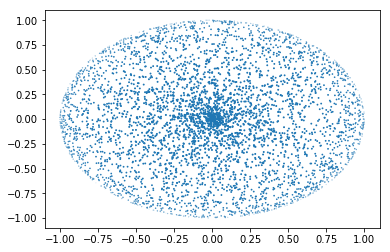

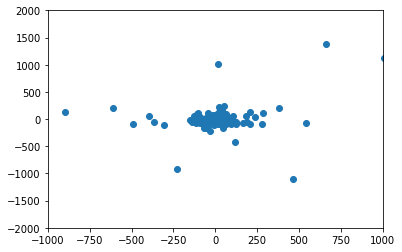

In [6]:
# Cell currently not working

# Stereographic Projection from Scratch
plt.clf()
spherical_data = [[float(x[7])*15,float(x[8]),x[6]] for x in naked_eye]
spherized = [[math.cos(x[0])*math.cos(x[1]),math.sin(x[0])*math.cos(x[1]),math.sin(x[1]),x[2]] for x in spherical_data]
# Sanity check for data; all these points should be ~1
# print('Highest x: ' + str(max([x[0] for x in stereographed])))
# print('Highest y: ' + str(max([x[1] for x in stereographed])))
# print('Highest z: ' + str(max([x[2] for x in stereographed])))
threed = plt.scatter([x[0] for x in spherized],[x[1] for x in spherized],[x[2] for x in spherized])
plt.show()
# Not sure where runtime error is coming from
# Now for the stereographic bit
plt.clf()
stereographed = [[x[0]/(1-x[2]),x[1]/(1-x[2])] for x in spherized]
plt.scatter([x[0] for x in stereographed],[x[1] for x in stereographed])
plt.axis([-1000,1000,-2000,2000])
plt.show()